# Investigate Vitamin C Antioxidant Property in Preventing Diseases

*EE of Katy*

This is a reflection on her data, visualisation, and implications. Let's startwith the method and measured results.

## Measuring the concentration

Katy wrote on page 10 for "vitamin C content (g/mol) in each fruit"

> volume of iodine used x molarity of standard iodine solution x mole ratio x ascorbic acid molar mass x volume of fruit juice used

Converted into a formula this gives

$$C_{AA}=V_{iodine}C_{iodine}R M_{AA}V_{fruit\_juice}$$

Looking at the units we see that this formula must be flawed. Volume $V$ is measured in $\text{ml}$ or $\text{cm}^3$ and molarity $C$ in $\text{mol/l}$. Molar mass $M$ is given as $\text{g/mol}$ and the ratio $R$ has no unit. Combined this results in  

$$\text{ml}\times \frac{\text{mol}}{\text{l}}\times 1\times \frac{\text{g}}{\text{mol}}\times \text{ml}=\frac{\text{ml}^2\text{g}}{\text{l}}$$

On page 11 she divides by the volume of the fruit juice. This leaves us with a concentration in gram per liter. The correct formula therefore should be

$$C_{AA}=C_{iodine}RM_{AA}\frac{V_{iodine}}{V_{fruit\_juice}}$$

Note that the concentration we calculate will no longer be in $mol/liter$ like the molarity of the iodine solution $\text{(0.025M)}$ but in $gram/liter$. While the former is widely used by chemist to determine the correct amount ($mol$) of substance for a chemical reaction, the latter one is used in more general cases.

## Converting the concentration

When searching for nutrition values, neither $\text{mol/l}$ nor $\text{g/l}$ is used. Instead, the concentration for vitamins is often given in $\text{mg/100g}$. We have to convert the units and do some assumptions on the way.

First we cannot easily convert the volume $\text{ml}$ to a mass $\text{g}$ since we don't know the density. But most fruits consist to a large amount of water and the density of water at room temperature is around $\text{1 kg/l = 1 g/ml}$ we can directly convert $\text{g}$ to $\text{ml}$. For the conversion from $\text{g}$ to $\text{mg}$ we have to multiply with 1000. To reference the number then to $\text{100g}$ instead of a liter or $\text{1kg}$ we have to divide the value by 10.

As a result we need to **multiply** Katy's values **by 100** to the desired concentration unit.

## Comparing the results

The concentrations are well known and pulished multiple times, for example by USDA ([link](https://fdc.nal.usda.gov/)).

| Fruit                             | Apple | Orange | Pear |
|-----------------------------------|:-----:|:------:|:----:|
| Concentration Katy (g/cm³)        |  2.59 |  8.24  | 2.53 |
| Converted concentration (mg/100g) |  259  |   824  |  253 |
| Reference concentration (mg/100g) |  4.6  |  53.2  |  4.3 |

The measured values seem to be significantly larger than the reference values. First let's reproduce the math:

In [ ]:
# trial 2: orange
V1 = 31.2     # volume of iodine used in ml
C1 = 0.025    # molarity or concentration of standard iodine solution in mol/l
R  = 3        # mole ratio
M2 = 176      # molar mass of ascorbic acid in g/mol
V2 = 50       # volume of fruid solution used in ml

C2 = V1 * C1 * R * M2 / V2
C2

8.236799999999999

So the math is correct. But the numbers are way to big. We use mathplotlib to visualize the difference.


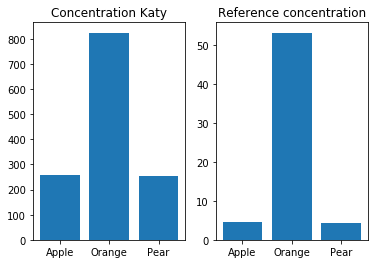

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = ['Apple','Orange','Pear']
c_katy = [259, 824, 253]
c_ref  = [4.6, 53.2, 4.3]
x_pos = np.arange(len(fruits))
plt.subplot(1, 2, 1)
plt.bar(x_pos,c_katy)
plt.xticks(x_pos, fruits)
plt.title('Concentration Katy')

plt.subplot(1, 2, 2)
plt.bar(x_pos,c_ref)
plt.xticks(x_pos, fruits)
plt.title('Reference concentration')

plt.show()

In part the relations are indicated correct. The concentration of vitamin C in oranges is much higher than in pears or apples. And the concentration in apples and pears is almost identical. The relation to the oranges has some visible error. And the absolute value is way off! Let's compare the concentrations in the same graph.

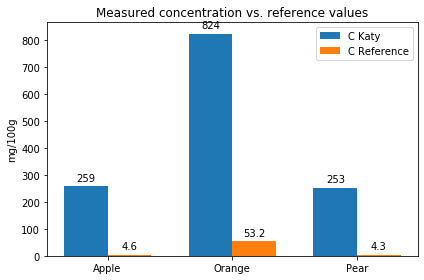

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = ['Apple','Orange','Pear']
c_katy = [259, 824, 253]
c_ref  = [4.6, 53.2, 4.3]

x_ps = np.arange(len(fruits))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_ps - width/2, c_katy, width, label='C Katy')
rects2 = ax.bar(x_ps + width/2, c_ref,  width, label='C Reference')

ax.set_ylabel('mg/100g')
ax.set_title('Measured concentration vs. reference values')
ax.set_xticks(x_ps)
ax.set_xticklabels(fruits)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

Now let's calculate and show the percentage error.

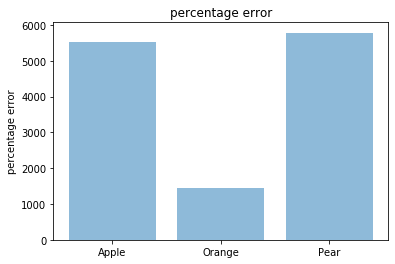

In [ ]:
c_error = []

for i in range(len(c_katy)):
  c_error.append((c_katy[i] - c_ref[i] )/ c_ref[i] * 100)

plt.bar(x_pos, c_error, align='center', alpha=0.5)
plt.xticks(x_pos, fruits)
plt.ylabel('percentage error')
plt.title('percentage error')

plt.show()                 

What is the reason? 5500% is a big deviation from the reference value. It's 55x bigger than it should be. Let's go back to the calculated concentration of the three fruits. The formula used is:

$$C_{AA}=C_{iodine}RM_{AA}\frac{V_{iodine}}{V_{fruit\_juice}}$$

The error must be in one of these 5 factors:

- Concentration of iodine
- Mole ratio iodine/ascorbic acid
- Molar mass of ascorbic acid
- Volume of iodine used
- Volume of fruit juice

The answer is ...

## Reference literature

The procedure has been well described in the literature. Here are a few examples, that include the formula, for example. It might help to find the error.

1) Procedure of titration with chemical formula

- http://employee.heartland.edu/rmuench/chem162/vitamin_c.pdf 
- http://faculty.icc.edu/bcook/c130xp5.pdf
- http://web.gccaz.edu/~rob2108739/Ascorbic%20Acid%20Titration/Ascorbic%20Acid%20Titration%20Background%20Spring%202010.pdf

2) Results with visualisation (from PRISM)

- https://pdfs.semanticscholar.org/6685/837664b00db65c990a99431f7c22a7e50708.pdf

3) Example paper with citations

- https://www.hindawi.com/journals/jamc/2008/937651/


